In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ("/content/boston.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
print(df.shape)

(506, 14)


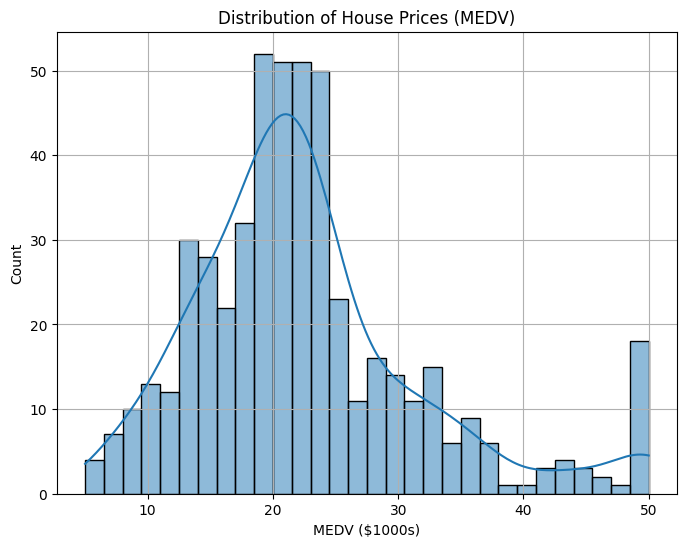

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df["MEDV"], bins=30, kde=True)
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

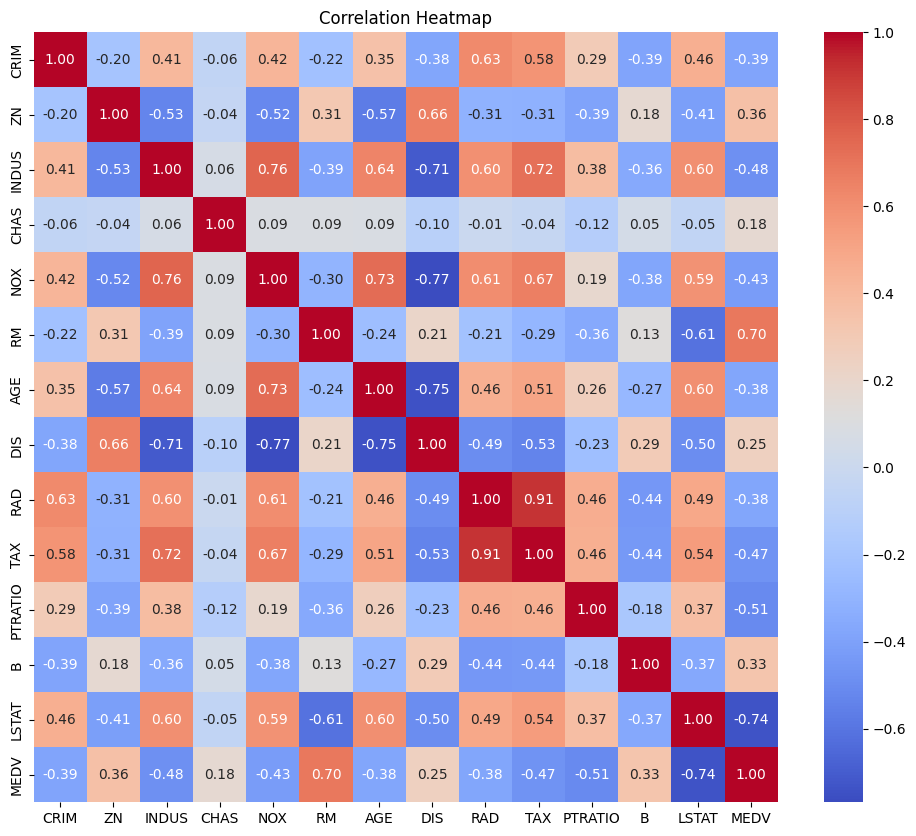

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

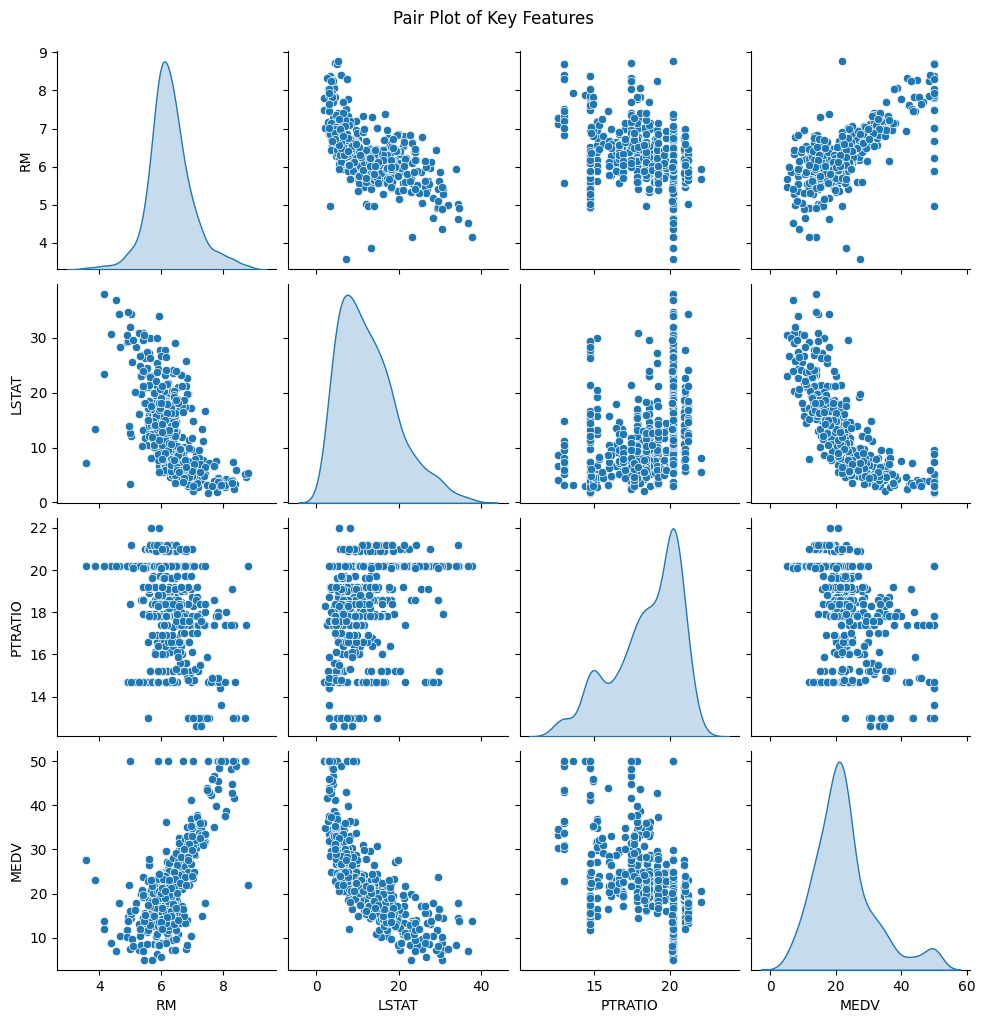

In [10]:
selected = ["RM", "LSTAT", "PTRATIO", "MEDV"]
sns.pairplot(df[selected], diag_kind="kde")
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

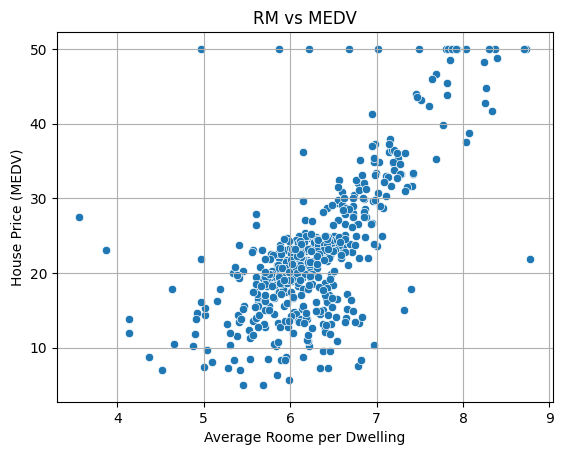

In [12]:
sns.scatterplot(x="RM", y="MEDV", data=df)
plt.title("RM vs MEDV")
plt.xlabel("Average Roome per Dwelling")
plt.ylabel("House Price (MEDV)")
plt.grid(True)
plt.show()

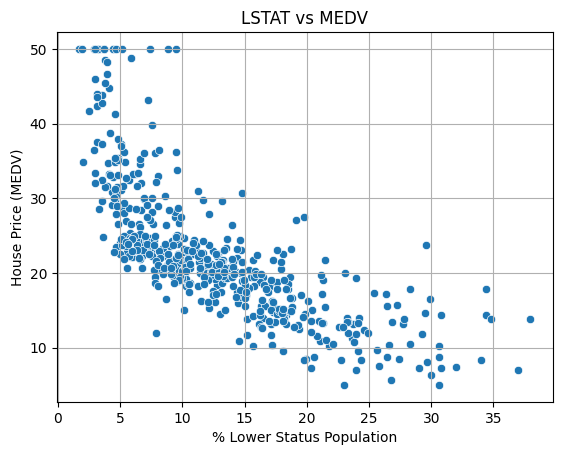

In [13]:
sns.scatterplot(x="LSTAT", y="MEDV", data=df)
plt.title("LSTAT vs MEDV")
plt.xlabel("% Lower Status Population")
plt.ylabel("House Price (MEDV)")
plt.grid(True)
plt.show()

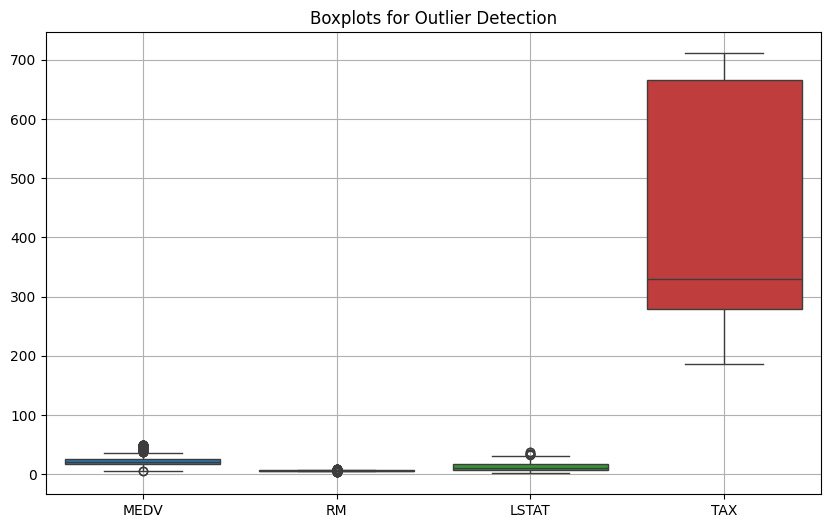

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["MEDV", "RM", "LSTAT", "TAX"]])
plt.title("Boxplots for Outlier Detection")
plt.grid(True)
plt.show()

| Plot Type           | Insights You Gain                             |
| ------------------- | --------------------------------------------- |
| Histogram of `MEDV` | Distribution and skewness of house prices     |
| Correlation Heatmap | Which features are most correlated with price |
| Pair Plot           | Bivariate relationships                       |
| Scatterplots        | Linearity and strength of feature-target link |
| Boxplots            | Presence of outliers                          |
| CHAS Boxplot        | Impact of location near river                 |


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [29]:
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 24.291119474973478
R² Score: 0.6687594935356326


In [30]:
import numpy as np

new_data = np.array([[0.1, 18.0, 2.3, 0, 0.5, 6.5, 60.0, 4.0, 1, 300, 15.0, 390.0, 5.0]])

predicated_price = lr.predict(new_data)

print("Predicated MEDV (House Price):", predicated_price[0])

Predicated MEDV (House Price): 30.562891975675143


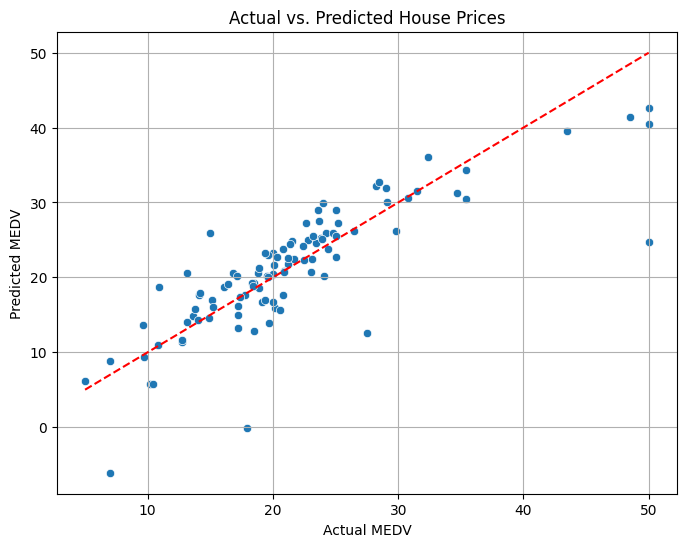

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = lr.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()


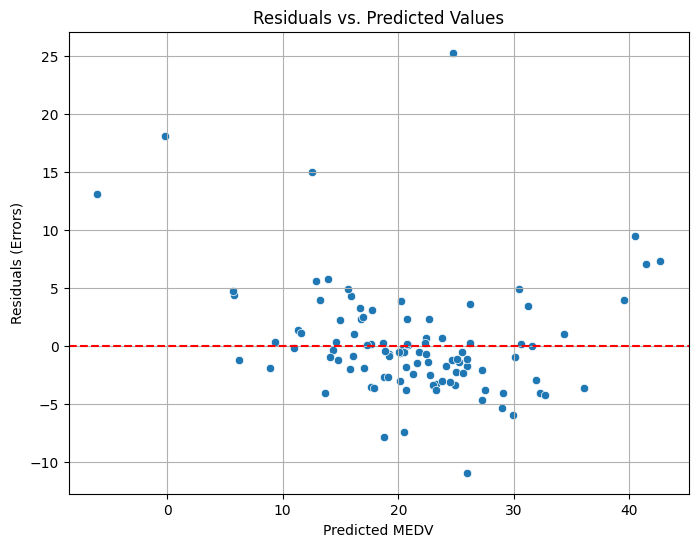

In [32]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals (Errors)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()

Residual > 0 → The model underpredicted (actual is more than predicted).

Residual < 0 → The model overpredicted (actual is less than predicted).

Residual = 0 → Perfect prediction.

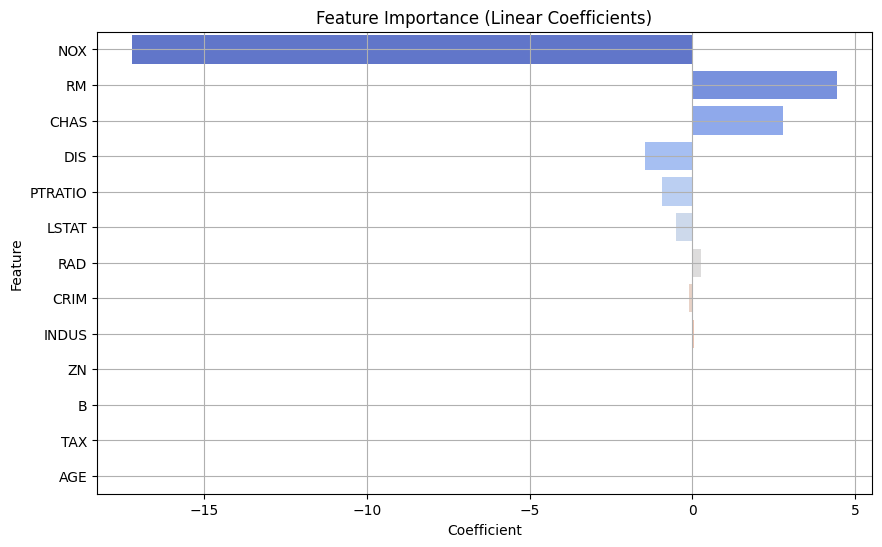

In [35]:
# Create a DataFrame of feature coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")
plt.title("Feature Importance (Linear Coefficients)")
plt.grid(True)
plt.show()